In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [5]:
X,y = make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, noise=50)


In [6]:
df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df['target'] = y

In [7]:
df

,feature_1,feature_2,target
0,0.050288,-1.647355,-89.746346
1,1.795376,-0.122047,186.984353
2,-0.496742,-0.574812,-152.334271
3,0.990504,-0.683583,38.597497
4,1.120926,0.135276,84.892479
...,...,...,...
995,-1.204368,1.314897,-60.341224
996,1.900862,0.995101,207.767081
997,1.189251,-1.141464,5.865302
998,1.874778,-2.259077,83.052515


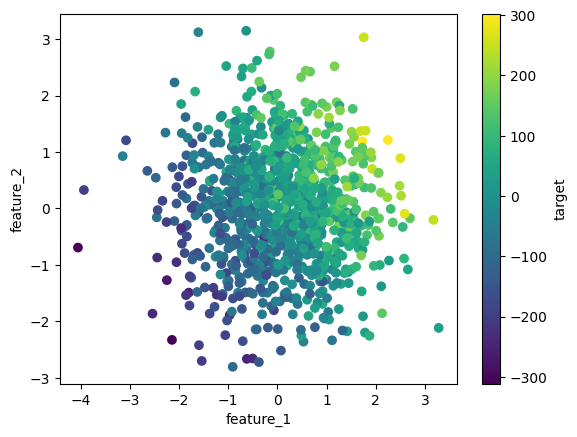

In [10]:
plt.scatter(df['feature_1'], df['feature_2'], c=df['target'], cmap='viridis')
plt.colorbar(label='target')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.show()
#

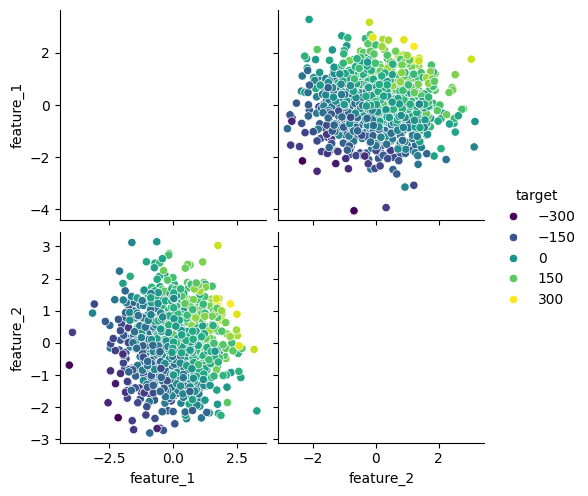

In [12]:
sns.pairplot(df, hue='target', palette='viridis')
plt.show()
#

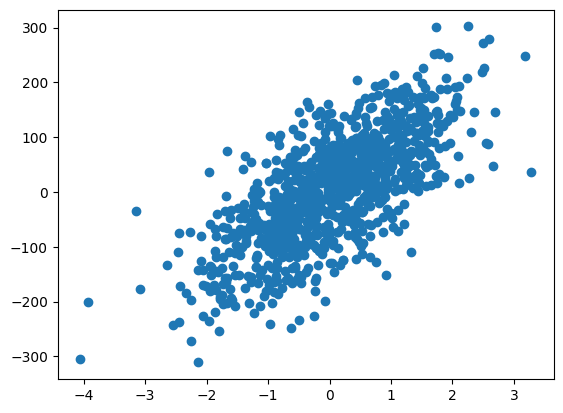

In [16]:
plt.scatter(df['feature_1'], df['target'])

<ipython-input-17-51f2db4bd906>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['target'])


<Axes: xlabel='target', ylabel='Density'>

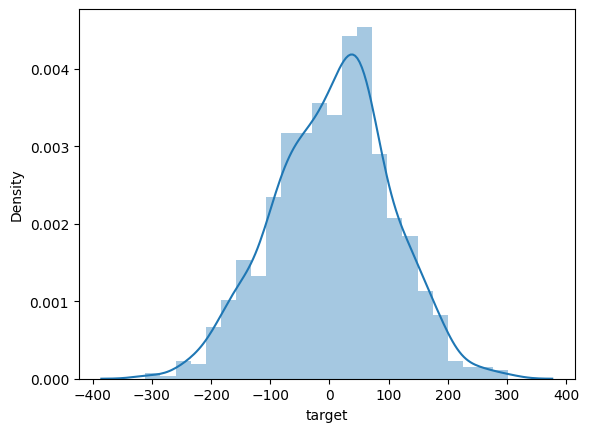

In [17]:
sns.distplot(df['target'])

<ipython-input-19-00821adf046c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['feature_1'])
<ipython-input-19-00821adf046c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['feature_2'])


<Axes: xlabel='feature_2', ylabel='Density'>

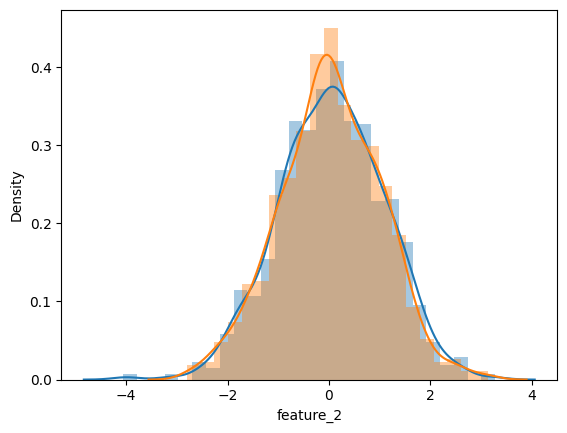

In [19]:
sns.distplot(df['feature_1'])
sns.distplot(df['feature_2'])

In [20]:
df.describe()

,feature_1,feature_2,target
count,1000.000000,1000.000000,1000.000000
mean,0.050214,0.029476,5.643142
std,1.034121,0.997313,98.623105
min,-4.055317,-2.806932,-311.038624
25%,-0.648172,-0.626836,-60.774210
50%,0.047265,0.030490,13.026032
75%,0.757540,0.736294,69.554083
max,3.280449,3.147347,301.920258


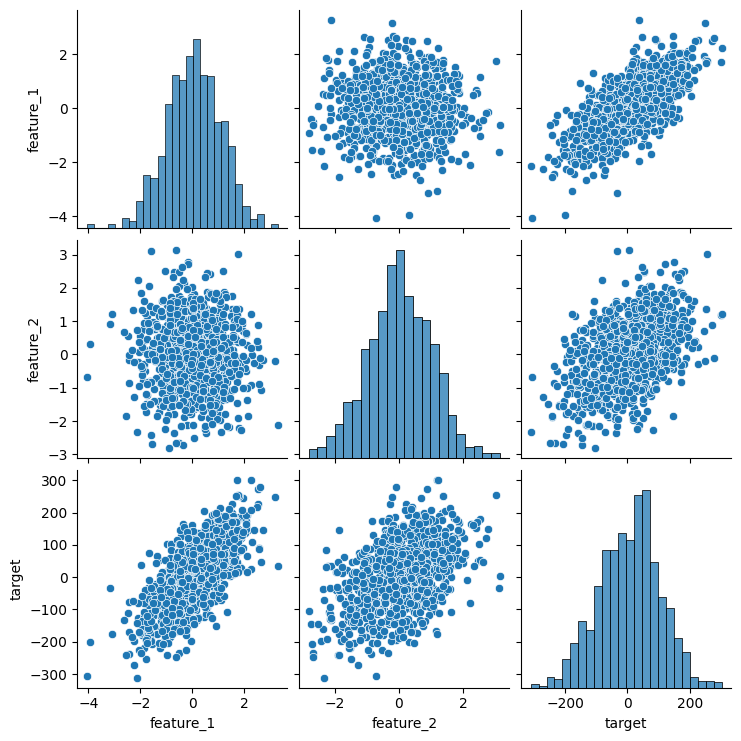

In [25]:
sns.pairplot(df)

In [28]:
fig = px.scatter_3d(df, x='feature_1', y='feature_2', z='target')

fig.show()


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [31]:
X_train

array([[-1.23469991e+00,  1.49176568e-04],
       [ 3.02755093e-01, -1.59667945e+00],
       [-2.44424832e+00, -8.71443082e-01],
       ...,
       [ 5.68002499e-01, -4.45193286e-01],
       [-8.74983299e-01,  1.09903703e+00],
       [-9.37413800e-01,  1.06653619e-01]])

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
lr.coef_

array([69.7706046 , 46.46160349])

In [36]:
lr.intercept_

0.6320123798689892

In [38]:
y_pred = lr.predict(X_test)

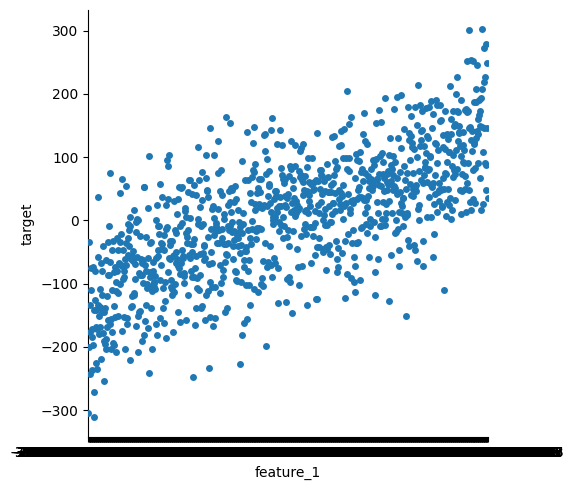

In [42]:
sns.catplot(x='feature_1', y='target', data=df)

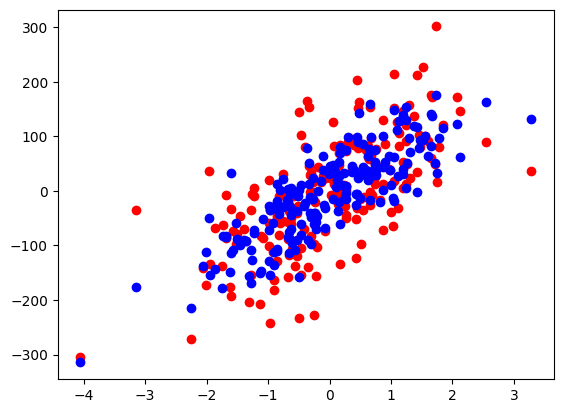

In [45]:
plt.scatter(X_test[:,0], y_test, color='red')
plt.scatter(X_test[:,0], y_pred, color='blue')
#

Text(0, 0.5, 'Package(in lpa)')

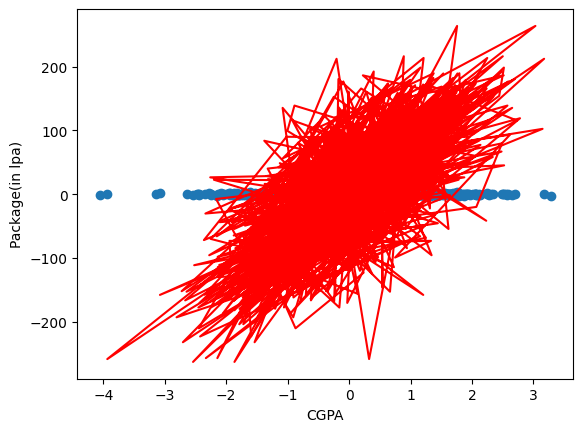

In [52]:
print("mean squre error",mean_squared_error(y_test,y_pred))
print("mean absolute error",mean_absolute_error(y_test,y_pred))
print("r2 score",r2_score(y_test,y_pred))

mean squre error 2877.5395577639424
mean absolute error 41.78580699496981
r2 score 0.718754890556396


In [55]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

# Define 'final' before using it
final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

z = z_final

In [56]:
z

array([[-580.52902809, -503.00613409, -425.48324009, -347.96034609,
        -270.43745209, -192.91455809, -115.39166409,  -37.86877009,
          39.65412391,  117.17701791],
       [-528.90502421, -451.38213021, -373.85923621, -296.33634221,
        -218.81344821, -141.29055421,  -63.76766021,   13.75523379,
          91.27812779,  168.80102179],
       [-477.28102033, -399.75812633, -322.23523233, -244.71233833,
        -167.18944432,  -89.66655032,  -12.14365632,   65.37923768,
         142.90213168,  220.42502568],
       [-425.65701644, -348.13412244, -270.61122844, -193.08833444,
        -115.56544044,  -38.04254644,   39.48034756,  117.00324156,
         194.52613556,  272.04902956],
       [-374.03301256, -296.51011856, -218.98722456, -141.46433056,
         -63.94143656,   13.58145744,   91.10435144,  168.62724544,
         246.15013944,  323.67303344],
       [-322.40900868, -244.88611468, -167.36322068,  -89.84032668,
         -12.31743268,   65.20546132,  142.72835532,  220

In [59]:
import plotly.graph_objects as go # Import the necessary module for surface plots
import plotly.express as px

fig = px.scatter_3d(df, x='feature_1', y='feature_2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()

In [61]:
class Mutlileaner:

  def __init__(self):
    self.coef_ = None
    self.intercept_ = None

  def fit(self, X_train, y_train):
    X_train = np.insert(X_train, 0, 1, axis=1)
    betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
    self.intercept_ = betas[0]
    self.coef_ = betas[1:]

  def predict(self, X_test):
    y_pred = np.dot(X_test, self.coef_) + self.intercept_
    return y_pred

In [62]:
import numpy as np
from sklearn.datasets import load_diabetes

In [63]:
X,y = load_diabetes(return_X_y=True)

In [64]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [66]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [70]:
X_train.shape

(353, 10)

In [71]:
mlr = Mutlileaner()

In [72]:
mlr.fit(X_train, y_train)

In [74]:
y_pred = mlr.predict(X_test)

In [75]:
mlr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [76]:
mlr.intercept_

151.88331005254165

In [77]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [79]:
print("mean squre error",mean_squared_error(y_test,y_pred))
print("mean absolute error",mean_absolute_error(y_test,y_pred))
print("r2 score",r2_score(y_test,y_pred))

mean squre error 3094.4566715660653
mean absolute error 45.21303419046907
r2 score 0.43993386615689634
